In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


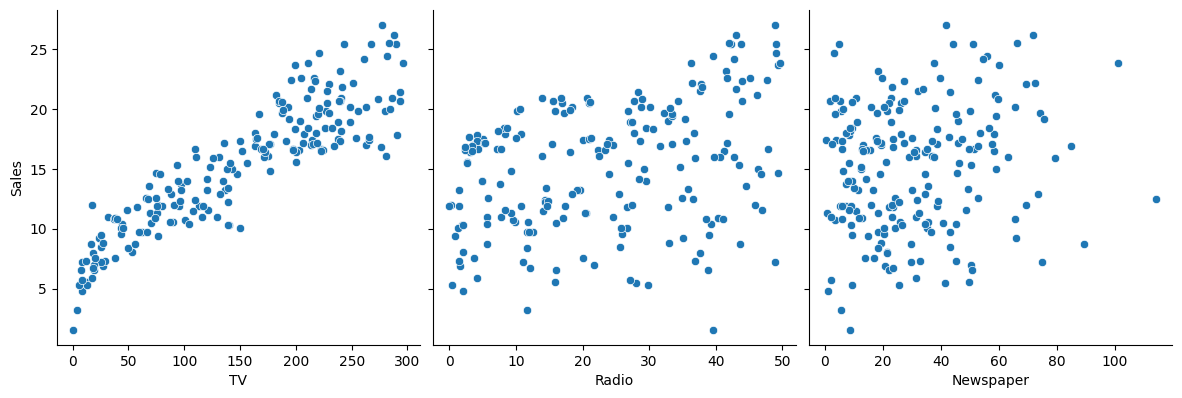

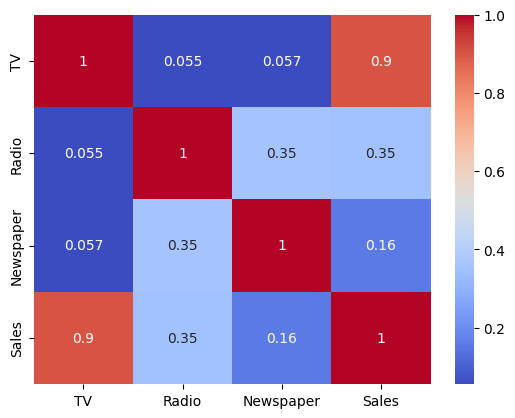

In [8]:
# Scatter plots for each advertising channel vs sales
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1)
plt.show()

# Correlation heatmap to check relationships
correlation_matrix = advertising.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


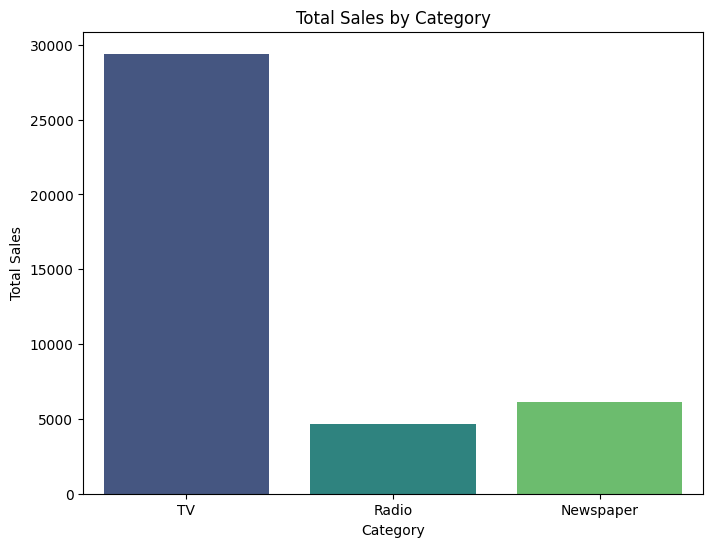

In [11]:
# Calculate total sales for each category
total_sales_by_category = {
    'TV': advertising['TV'].sum(),
    'Radio': advertising['Radio'].sum(),
    'Newspaper': advertising['Newspaper'].sum()
}

# Convert dictionary to DataFrame for plotting
category_df = pd.DataFrame.from_dict(
    total_sales_by_category, orient='index', columns=['Total Sales']
)

# Create a bar chart for sales by category
plt.figure(figsize=(8, 6))
sns.barplot(x=category_df.index, y='Total Sales', data=category_df, hue=category_df.index, palette='viridis', legend=False)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()

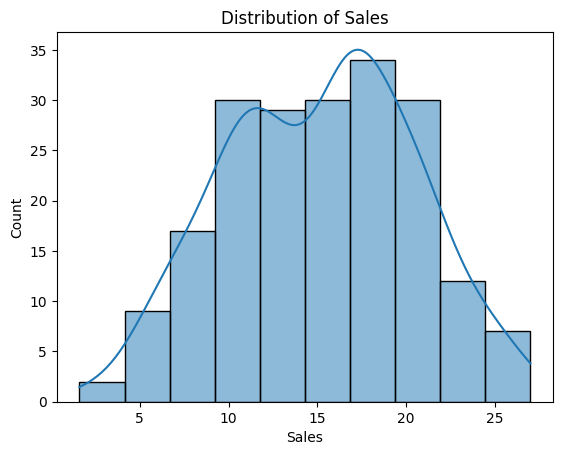

In [13]:
# Histogram to visualize the distribution of sales
sns.histplot(advertising['Sales'], kde=True)  # KDE adds a smooth curve to the histogram
plt.title('Distribution of Sales')
plt.show()


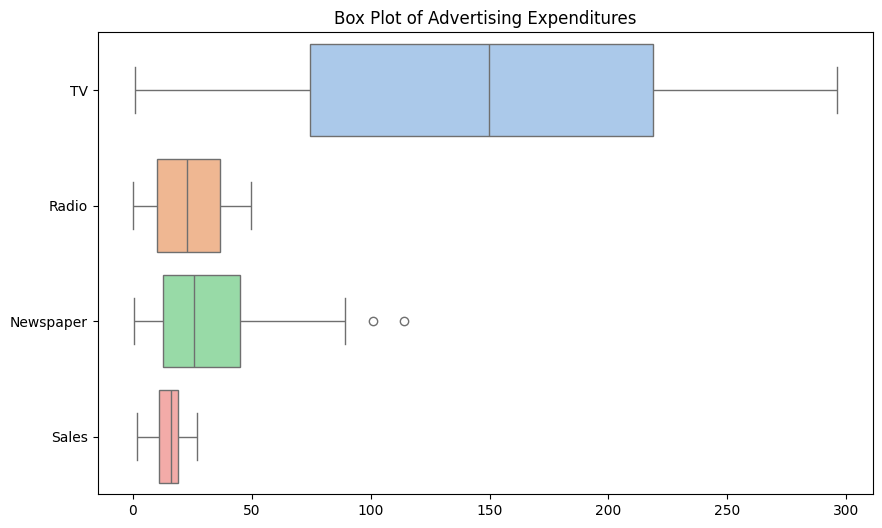

In [14]:
# Box plot to check for outliers in advertising data
plt.figure(figsize=(10, 6))
sns.boxplot(data=advertising, orient='h', palette='pastel')
plt.title('Box Plot of Advertising Expenditures')
plt.show()


In [17]:
# Example: Adding interaction terms for feature engineering (optional)
advertising['TV_Radio_Interaction'] = advertising['TV'] * advertising['Radio']

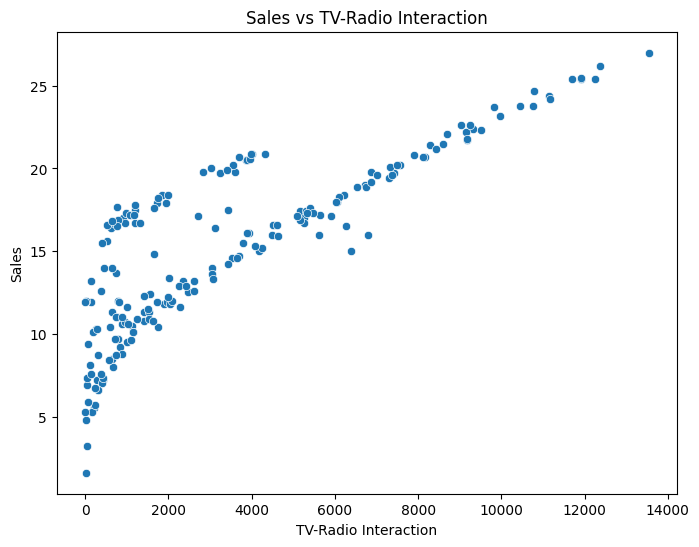

In [18]:
# Scatter plot of TV-Radio interaction with Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV_Radio_Interaction', y='Sales', data=advertising)
plt.xlabel('TV-Radio Interaction')
plt.ylabel('Sales')
plt.title('Sales vs TV-Radio Interaction')
plt.show()


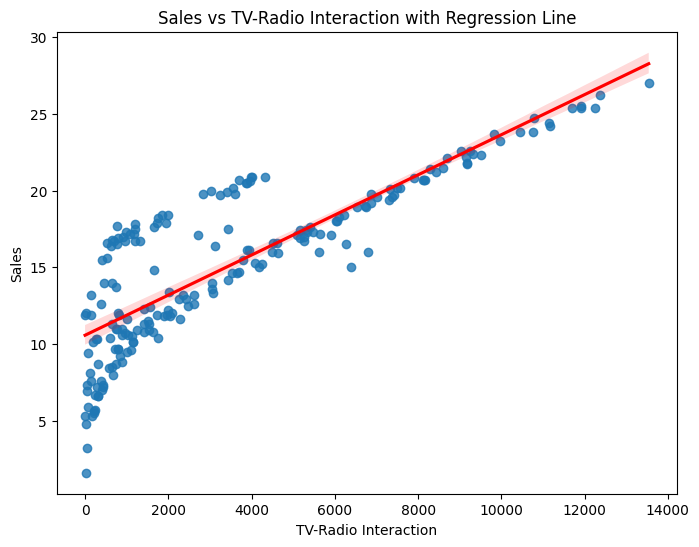

In [19]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='TV_Radio_Interaction', y='Sales', data=advertising, scatter=True, line_kws={"color": "red"})
plt.xlabel('TV-Radio Interaction')
plt.ylabel('Sales')
plt.title('Sales vs TV-Radio Interaction with Regression Line')
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = advertising[['TV', 'Radio', 'Newspaper', 'TV_Radio_Interaction']]
y = advertising['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
# Example new data for prediction
new_data = pd.DataFrame({
    'TV': [100.0],
    'Radio': [30.0],
    'Newspaper': [50.0],
    'TV_Radio_Interaction': [100.0 * 30.0]
})

# Predict sales for new data
predicted_sales = model.predict(new_data)

print(f'Predicted Sales: {predicted_sales[0]:.2f}')


Mean Squared Error: 2.38
R-squared: 0.92
Predicted Sales: 13.26


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Decision Tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - MSE: {mse_tree:.2f}, R-squared: {r2_tree:.2f}")

# Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest - MSE: {mse_forest:.2f}, R-squared: {r2_forest:.2f}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb:.2f}, R-squared: {r2_gb:.2f}")


Decision Tree - MSE: 2.17, R-squared: 0.93
Random Forest - MSE: 1.18, R-squared: 0.96
Gradient Boosting - MSE: 1.06, R-squared: 0.97


In [23]:
from sklearn.svm import SVR

# Support Vector Regression
svr_model = SVR(kernel='rbf')  # Radial Basis Function kernel
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {mse_svr:.2f}, R-squared: {r2_svr:.2f}")


Support Vector Regression - MSE: 5.92, R-squared: 0.81


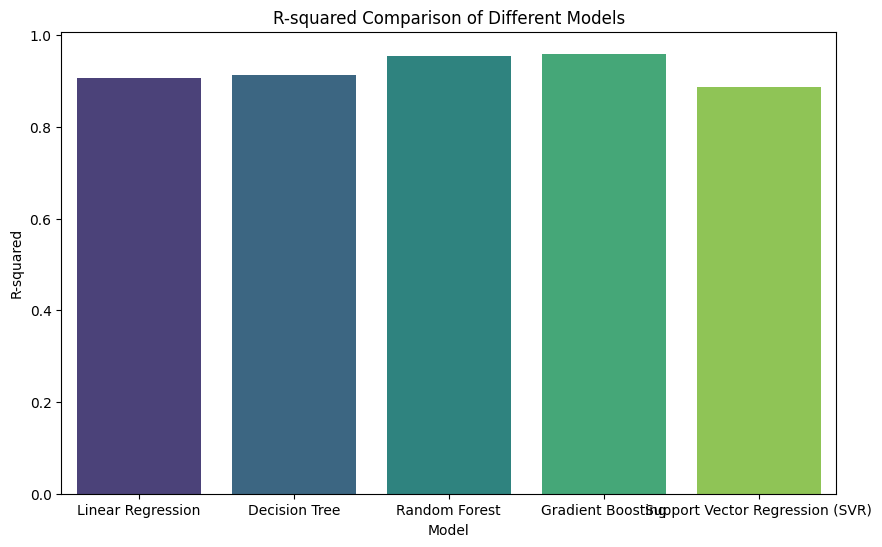

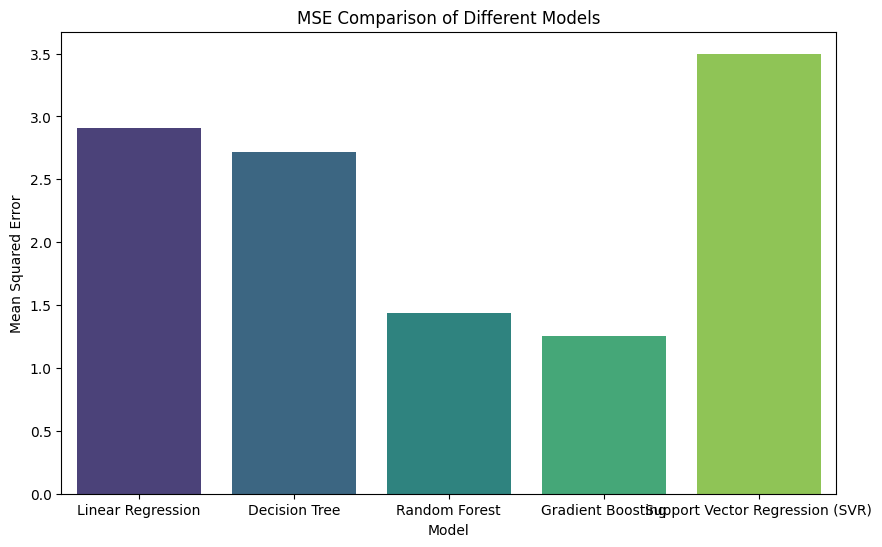

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Features and target variable
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression (SVR)': SVR(kernel='rbf')
}

# Dictionary to store accuracy metrics (R-squared and MSE)
model_performance = {}

# Train each model and calculate accuracy metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[model_name] = {'R-squared': r2, 'MSE': mse}


# Convert model performance to DataFrame
performance_df = pd.DataFrame(model_performance).T  # Transpose for easier plotting

# Bar plot for R-squared values
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df.index, y='R-squared', data=performance_df, hue=performance_df.index , palette='viridis',legend=False)
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.title("R-squared Comparison of Different Models")
plt.show()

# Bar plot for Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df.index, y='MSE', data=performance_df, hue=performance_df.index , palette='viridis',legend=False)
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("MSE Comparison of Different Models")
plt.show()
